In [9]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import operator
import sys
from sklearn.model_selection import train_test_split
eps = np.finfo(float).eps
from numpy import log2 as log

def loadfile():
        filename='/home/neelesh/Downloads/Iris.csv'
        df = pd.read_csv(filename, header=None, names=(['A','B','C','D','Res']))
        X = df[['A','B','C','D']] 
        # X = df[['Work_accident','sales','promotion_last_5years','salary']] 
        Y = df[['Res']] 
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
        X_train=X_train.reset_index(drop=True)
        Y_train=Y_train.reset_index(drop=True)
        X_test=X_test.reset_index(drop=True)
        Y_test=Y_test.reset_index(drop=True)
        df=pd.concat([X_train,Y_train], axis=1)
        return df,X_train, X_test, Y_train, Y_test

In [10]:
def getEuclidDis(X1,X2):
    distance = 0
    for i in range(0,len(X2)):
                    distance += pow((X2[i] - X1[i]), 2)
    return math.sqrt(distance)
def getManhattenDis(X1,X2):
    distance = 0
    for i in range(0,len(X2)):
                    distance +=abs((X2[i] - X1[i]))
    return distance
def getChebyshevDis(X1,X2):
    distance = 0
    for i in range(0,len(X2)):
                    distance=max(distance,abs((X2[i] - X1[i])))
    return distance
def getCanberraDis(X1,X2):
    distance = 0
    for i in range(0,len(X2)):
                    distance +=(abs((X2[i] - X1[i]))/(abs(X1[i])+abs(X2[i])))
    return distance
def getHellingerDis(X1,X2):
    distance = 0
    for i in range(0,len(X2)):
                    distance +=pow(abs((math.sqrt(X2[i]) - math.sqrt(X1[i]))),2)
    return math.sqrt(distance)/math.sqrt(2)

In [11]:
def checkNeighbours(num,df,sample):
    Neighbour_dis= []
    for i in range(0,len(df)):
        if(num==1):
             dist = getEuclidDis(df.iloc[i],sample)
        if(num==2):
             dist=getManhattenDis(df.iloc[i],sample)
        if(num==3):
            dist=getChebyshevDis(df.iloc[i],sample)
        if(num==4):
            dist=getCanberraDis(df.iloc[i],sample)
        if(num==5):
            dist=getHellingerDis(df.iloc[i],sample)
        Neighbour_dis.append((df.iloc[i], dist))
    return Neighbour_dis
 

In [12]:
def selectbestk(myneighbour,k):
    myneighbour.sort(key=operator.itemgetter(1))
    bestk=[]
    for i in range(0,k):
        bestk.append(myneighbour[i][0])
    return bestk
    

In [13]:
def predict( kneighbours,k):


        classVotes = {}
        for x in range(len(kneighbours)):
            response = kneighbours[x][-1]
            if response in classVotes:
                classVotes[response] += 1
            else:
                classVotes[response] = 1
        sortedVotes = sorted(classVotes.iteritems(), key=operator.itemgetter(1), reverse=True)
        return sortedVotes[0][0]

    

In [14]:
def getAccuracy(testSet, predictions):
        correct = 0
        TP={}
        Pred={}
        Real={}
        for x in range(len(testSet)):
            if(testSet[x] in Real):
                Real[testSet[x]]+=1
            else:
                Real[testSet[x]]=1
            if(predictions[x] in Pred):
                Pred[predictions[x]]+=1
            else:
                Pred[predictions[x]]=1
            if testSet[x] == predictions[x]:
                if(testSet[x] in TP):
                    TP[testSet[x]]+=1
                else:
                    TP[testSet[x]]=1
                correct += 1
        return correct

<=========Graph for Euclidean Distance==========>


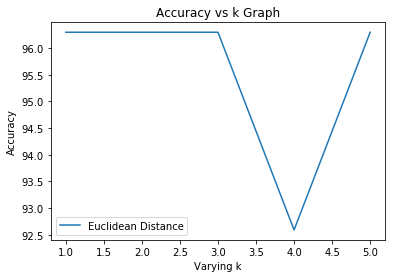

<=========Graph for Manhatten Distance==========>


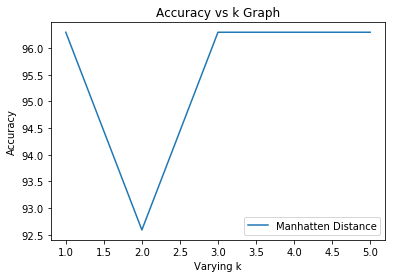

<=========Graph for Chebyshev Distance==========>


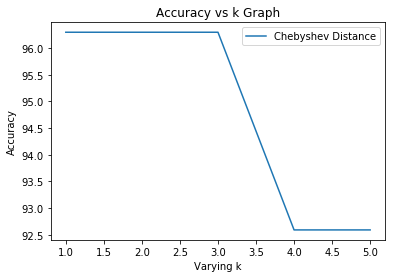

<=========Graph for Canberra Distance===========>


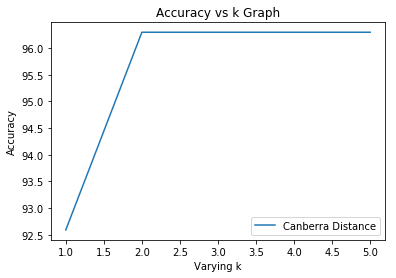

<=========Graph for Hellinger Distance==========>


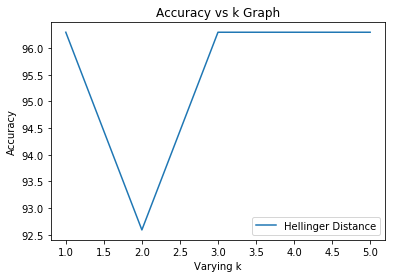

In [15]:
def predict_helper(df,num,X_test,Y_test,k):
    
    res=[]
    for i in range(0,len(X_test)):
        test=X_test.iloc[i]
        neighbours = checkNeighbours(num,df,test)
        kneighbours=selectbestk(neighbours,k)
        p=predict(kneighbours,test)
        res.append(p)            
    test_array=np.array(Y_test['Res'])
    attrib=Y_test['Res'].unique()
    correct=getAccuracy(test_array,res)
    return (correct*100.0)/len(test_array)


nodes = [1,2,3,4,5]
def show(num,label1):
    df,X_train, X_test, Y_train, Y_test=loadfile()
#     if(len(sys.argv)>1):
#             Test_Filename=sys.argv[1]
#             testdf =pd.read_csv(Test_Filename, header=None, names=(['A','B','C','D','Res']))
#             X_test=testdf[['A','B','C','D']]  
#             Y_test=testdf[['Res']]
    Test_acc1=[]
    for i in range(1,6):
        A1=predict_helper(df,num,X_test,Y_test,i)
        Test_acc1.append(A1) 
    plt.title('Accuracy vs k Graph')
    plt.plot(nodes,Test_acc1, label = label1)
    plt.legend()
    plt.xlabel('Varying k')
    plt.ylabel('Accuracy')
    plt.show() 
print "<=========Graph for Euclidean Distance==========>" 
show(1,'Euclidean Distance')
print "<=========Graph for Manhatten Distance==========>" 
show(2,'Manhatten Distance')
print "<=========Graph for Chebyshev Distance==========>" 
show(3,'Chebyshev Distance')
print "<=========Graph for Canberra Distance===========>"
show(4,'Canberra Distance')
print "<=========Graph for Hellinger Distance==========>" 
show(5,'Hellinger Distance')   

# Observations:

Clearly from the above graphs it can be seen that whenever k is assigned an even number its result is not good since with even number there can be ambiguity to which class the test sample lies if k/2 neighbours lies in one class and remaining in other.

For high dimensional vectors you might find that Manhattan works better than the Euclidean distance.

The reason for this is quite simple to explain. Consider the case where we use the l∞ norm that is the Minkowski distance with exponent = infinity. Then the distance is the highest difference between any two dimensions of your vectors. We can see this doesn't make sense in many dimensions as we would be ignoring most of the dimensionality and measuring distance based on a single attribute.

Thus reducing the exponent makes the other features play a bigger role in the distance calculation. The lower the exponent the less relevant a high difference in some given dimension will be.

Something interesting is that distances with exponent <1 might work even better than Manhattan: (||x−y||p)1/p with p<1. This distances are curiously not valid metrics as the triangular inequality doesn't hold but they can be used anyway.